# Trabalho Final - Big Data

Implementação de uma estratégia de *Big Data Analytics* para montar um modelo para identificar clientes de um banco que são bons ou maus pagadores (Creditability).

### Dependências

Pacotes/bibliotecas necessários para a execução deste projeto.

In [3]:
!pip install spark-sklearn

### Leitura dos Dados

Nesta etapa realiza-se a leitura dos dados já adquiridos em csv, para que estes sejam posteriormente processados utilizando *pyspark*.

In [5]:
# File location and type
file_location = "/FileStore/tables/index.csv"
file_type = "csv"

# CSV options
infer_schema = "false"
first_row_is_header = "true"
delimiter = ","

# The applied options are for CSV files. For other file types, these will be ignored.
df = spark.read.format(file_type) \
  .option("inferSchema", infer_schema) \
  .option("header", first_row_is_header) \
  .option("sep", delimiter) \
  .load(file_location)

display(df)


Creditability,Account Balance,Duration of Credit (month),Payment Status of Previous Credit,Purpose,Credit Amount,Value Savings/Stocks,Length of current employment,Instalment per cent,Sex & Marital Status,Guarantors,Duration in Current address,Most valuable available asset,Age (years),Concurrent Credits,Type of apartment,No of Credits at this Bank,Occupation,No of dependents,Telephone,Foreign Worker
1,1,18,4,2,1049,1,2,4,2,1,4,2,21,3,1,1,3,1,1,1
1,1,9,4,0,2799,1,3,2,3,1,2,1,36,3,1,2,3,2,1,1
1,2,12,2,9,841,2,4,2,2,1,4,1,23,3,1,1,2,1,1,1
1,1,12,4,0,2122,1,3,3,3,1,2,1,39,3,1,2,2,2,1,2
1,1,12,4,0,2171,1,3,4,3,1,4,2,38,1,2,2,2,1,1,2
1,1,10,4,0,2241,1,2,1,3,1,3,1,48,3,1,2,2,2,1,2
1,1,8,4,0,3398,1,4,1,3,1,4,1,39,3,2,2,2,1,1,2
1,1,6,4,0,1361,1,2,2,3,1,4,1,40,3,2,1,2,2,1,2
1,4,18,4,3,1098,1,1,4,2,1,4,3,65,3,2,2,1,1,1,1
1,2,24,2,3,3758,3,1,1,2,1,4,4,23,3,1,1,1,1,1,1


### Análise Exploratória Inicial

Uma tarefa importante de Big Data Analytics é a análise descritiva/exploratória. Esta tarefa é crucial pois permite que nós possamos compreender a natureza dos dados que serão tratados posteriormente.

Vamos **visualizar** nossos dados:

In [7]:
# Create a view or table

temp_table_name = "index_csv"

df.createOrReplaceTempView(temp_table_name)

In [8]:
%sql

/* Query the created temp table in a SQL cell */

select * from `index_csv`

Creditability,Account Balance,Duration of Credit (month),Payment Status of Previous Credit,Purpose,Credit Amount,Value Savings/Stocks,Length of current employment,Instalment per cent,Sex & Marital Status,Guarantors,Duration in Current address,Most valuable available asset,Age (years),Concurrent Credits,Type of apartment,No of Credits at this Bank,Occupation,No of dependents,Telephone,Foreign Worker
1,1,18,4,2,1049,1,2,4,2,1,4,2,21,3,1,1,3,1,1,1
1,1,9,4,0,2799,1,3,2,3,1,2,1,36,3,1,2,3,2,1,1
1,2,12,2,9,841,2,4,2,2,1,4,1,23,3,1,1,2,1,1,1
1,1,12,4,0,2122,1,3,3,3,1,2,1,39,3,1,2,2,2,1,2
1,1,12,4,0,2171,1,3,4,3,1,4,2,38,1,2,2,2,1,1,2
1,1,10,4,0,2241,1,2,1,3,1,3,1,48,3,1,2,2,2,1,2
1,1,8,4,0,3398,1,4,1,3,1,4,1,39,3,2,2,2,1,1,2
1,1,6,4,0,1361,1,2,2,3,1,4,1,40,3,2,1,2,2,1,2
1,4,18,4,3,1098,1,1,4,2,1,4,3,65,3,2,2,1,1,1,1
1,2,24,2,3,3758,3,1,1,2,1,4,4,23,3,1,1,1,1,1,1


Podemos notar que todas as colunas são numéricas, apesar de algumas representarem classes. Vamos verificar se nosso dataframe já interpreta corretamente os **tipos** destes atributos:

In [10]:
df.dtypes

Out[ 3 ]: 
[('Creditability', 'string'),
 ('Account Balance', 'string'),
 ('Duration of Credit (month)', 'string'),
 ('Payment Status of Previous Credit', 'string'),
 ('Purpose', 'string'),
 ('Credit Amount', 'string'),
 ('Value Savings/Stocks', 'string'),
 ('Length of current employment', 'string'),
 ('Instalment per cent', 'string'),
 ('Sex & Marital Status', 'string'),
 ('Guarantors', 'string'),
 ('Duration in Current address', 'string'),
 ('Most valuable available asset', 'string'),
 ('Age (years)', 'string'),
 ('Concurrent Credits', 'string'),
 ('Type of apartment', 'string'),
 ('No of Credits at this Bank', 'string'),
 ('Occupation', 'string'),
 ('No of dependents', 'string'),
 ('Telephone', 'string'),
 ('Foreign Worker', 'string')]

Podemos observar que os dados foram interpretados como strings. Todavia, sabemos que nossas categorias deveriam ser interpretadas como numéricas apenas. Assim, **realizamos a conversão** e verificamos o tipo resultante das colunas.

In [12]:
import pandas as pd

dados = df.toPandas()
dados = dados.apply(pd.to_numeric)
#dados.head(10)
dados.dtypes

Out[ 4 ]: 
Creditability int64
Account Balance int64
Duration of Credit (month) int64
Payment Status of Previous Credit int64
Purpose int64
Credit Amount int64
Value Savings/Stocks int64
Length of current employment int64
Instalment per cent int64
Sex & Marital Status int64
Guarantors int64
Duration in Current address int64
Most valuable available asset int64
Age (years) int64
Concurrent Credits int64
Type of apartment int64
No of Credits at this Bank int64
Occupation int64
No of dependents int64
Telephone int64
Foreign Worker int64
dtype: object

Com os tipos corretos, podemos **transformar** nossos dados para um formato de DataFrame do *pyspark*:

In [14]:
from pyspark.sql import Row
from pyspark.ml.linalg import Vectors

spDF = sqlContext.createDataFrame(dados)
#spDF.show()
trainingData=spDF.rdd.map(lambda x:(Vectors.dense(x[1:]), x[0])).toDF(["features", "label"])
trainingData.show()

+--------------------+-----+
 features|label|
+--------------------+-----+
[1.0,18.0,4.0,2.0...| 1|
[1.0,9.0,4.0,0.0,...| 1|
[2.0,12.0,2.0,9.0...| 1|
[1.0,12.0,4.0,0.0...| 1|
[1.0,12.0,4.0,0.0...| 1|
[1.0,10.0,4.0,0.0...| 1|
[1.0,8.0,4.0,0.0,...| 1|
[1.0,6.0,4.0,0.0,...| 1|
[4.0,18.0,4.0,3.0...| 1|
[2.0,24.0,2.0,3.0...| 1|
[1.0,11.0,4.0,0.0...| 1|
[1.0,30.0,4.0,1.0...| 1|
[1.0,6.0,4.0,3.0,...| 1|
[2.0,48.0,3.0,10....| 1|
[1.0,18.0,2.0,3.0...| 1|
[1.0,6.0,2.0,3.0,...| 1|
[1.0,11.0,4.0,0.0...| 1|
[2.0,18.0,2.0,3.0...| 1|
[2.0,36.0,4.0,3.0...| 1|
[4.0,11.0,4.0,0.0...| 1|
+--------------------+-----+
only showing top 20 rows

In [15]:
trainingData.dtypes

Out[ 7 ]: [('features', 'vector'), ('label', 'bigint')]

### Modelo de Análise de Risco de Crédito

Optamos pela implementação de um modelo de **Regressão Logística** (*Logistic Regression*) para avaliar se um dado cliente é adequado para a concessão de crédito financeiro. Este processamento foi realizado através da biblioteca *SparkML*.

Para o treino e teste do nosso modelo, realizamos a separação dos dados através da metodologia [Holdout](https://pt.wikipedia.org/wiki/Valida%C3%A7%C3%A3o_cruzada#M%C3%A9todo_holdout). Em particular, decidiu-se pela separação em um percentual de 80% para treino e 20% para teste.

In [17]:
from pyspark.ml.classification import LogisticRegression

# Split data into training (80%) and test (20%) - holdout
training, test = trainingData.randomSplit([0.8, 0.2], seed=42)

# Logistic Regression with Regularization
lr = LogisticRegression(regParam = 0.003, elasticNetParam=1)

# Fit the model
lrModel = lr.fit(training)

# Print the coefficients and intercept for logistic regression
print("Coefficients: " + str(lrModel.coefficientMatrix))
print("Intercept: " + str(lrModel.interceptVector))

Coefficients: DenseMatrix([[ 5.62598990e-01, -2.93610830e-02, 3.90792907e-01,
 2.16722724e-03, -9.58080783e-05, 2.13815947e-01,
 2.12363440e-01, -3.44335108e-01, 2.49458987e-01,
 2.91400859e-01, -9.36325963e-03, -1.55267909e-01,
 5.32554250e-03, 9.50649628e-02, 1.76367464e-01,
 -3.34652130e-01, -1.18351740e-01, -1.89785652e-01,
 3.17172054e-01, 1.19470566e-01]])
Intercept: [-1.4245280019]

Os coeficientes do nosso modelo de regressão logística traduzem, em parte, a importância dos atributos no modelo. Por exemplo, se uma variável **v1** está associada a um coeficiente **c1** próximo de zero, seu impacto na realização das predições é pequeno.

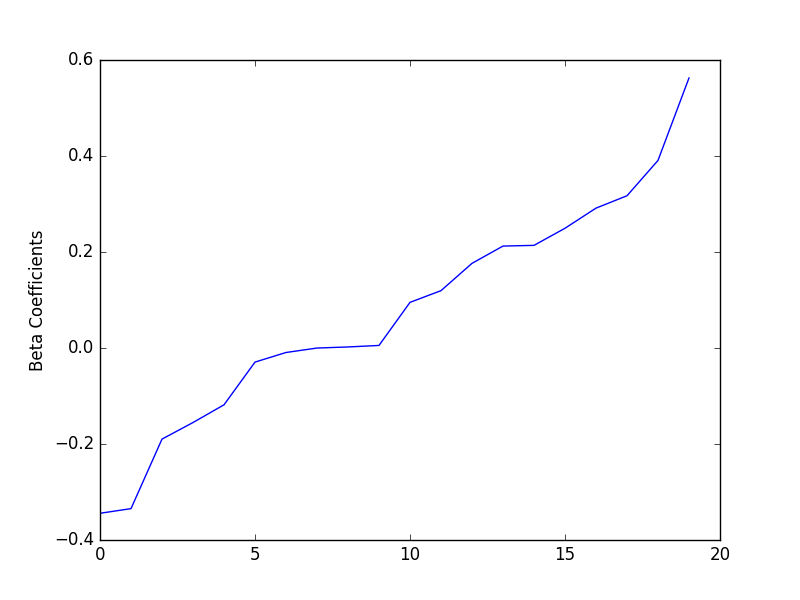

In [19]:
import numpy as np
import matplotlib.pyplot as plt

beta = np.sort(lrModel.coefficients)
fig, ax = plt.subplots()
plt.plot(beta)
plt.ylabel('Beta Coefficients')
display(fig)

Podemos observar que não há coeficientes nulos, indicando que todas as variáveis impactam de forma relevante as decisões do modelo.

In [21]:
from pyspark.ml.evaluation import BinaryClassificationEvaluator

trainingSummary = lrModel.summary

# Obtain the objective per iteration
# objectiveHistory = trainingSummary.objectiveHistory
# print("objectiveHistory:")
# for objective in objectiveHistory:
#     print(objective)

# Obtain the receiver-operating characteristic as a dataframe and areaUnderROC.
# trainingSummary.roc.show()
print("Training AUC: " + str(trainingSummary.areaUnderROC))

# Set the model threshold to maximize F-Measure
fMeasure = trainingSummary.fMeasureByThreshold
maxFMeasure = fMeasure.groupBy().max('F-Measure').select('max(F-Measure)').head()
bestThreshold = fMeasure.where(fMeasure['F-Measure'] == maxFMeasure['max(F-Measure)']) \
    .select('threshold').head()['threshold']
lr.setThreshold(bestThreshold)

# Make predictions.
predictions = lrModel.transform(test)

# Select (prediction, true label) and compute test error
evaluator = BinaryClassificationEvaluator()
AUC = evaluator.evaluate(predictions, {evaluator.metricName: "areaUnderROC"})
print("Test AUC: %g" % (AUC))


Training AUC: 0.803307109669
Test AUC: 0.784365

Nota-se que o modelo consegue discriminar razoavelmente bem os clientes elegíveis para concessão de crédito. Além disso, podemos afirmar que o modelo não apresenta indícios de *overfitting* (sobreajuste), uma vez que a métrica **AUC** não apresenta diferença expressiva entre treino e teste.

Podemos observar com mais detalhes as curvas **ROC** (*Receiver-Operating Characteristic Curve*) e a curva de **Precisão-Revocação** (*Precision-Recall Curve*).

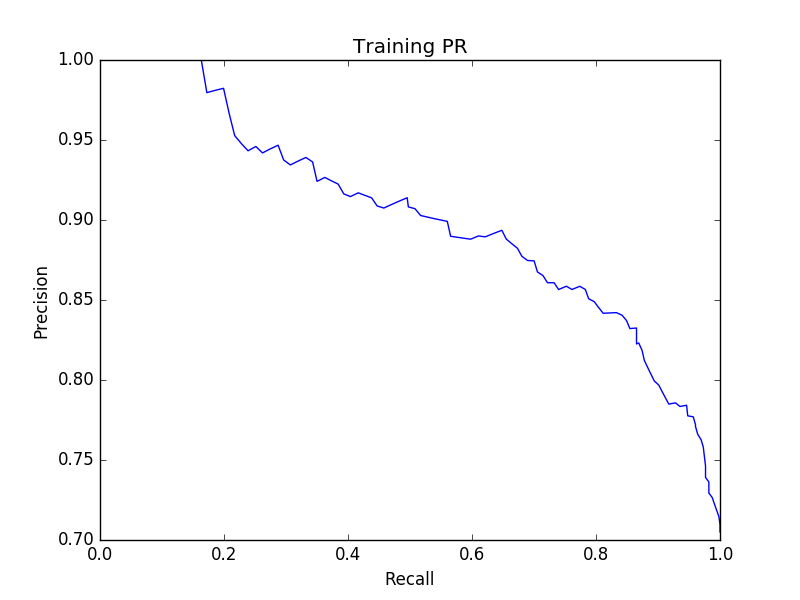

In [23]:
import matplotlib.pyplot as plt

### Precision x Recall
fig, ax = plt.subplots()
pr = trainingSummary.pr.toPandas()
plt.plot(pr['recall'], pr['precision'])
plt.ylabel('Precision')
plt.xlabel('Recall')
plt.title('Training PR')
display(fig)

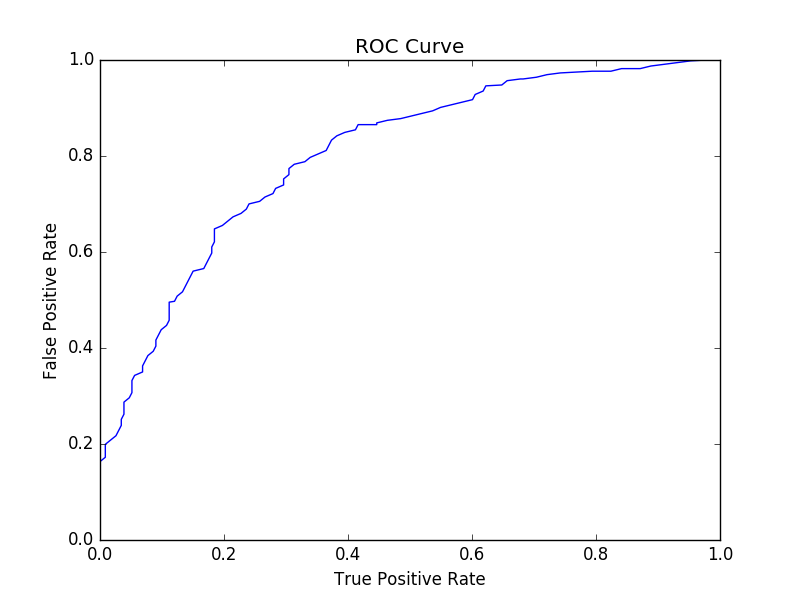

In [24]:
#### Let's See the ROC

fig, ax = plt.subplots()
roc = trainingSummary.roc.toPandas()
plt.plot(roc['FPR'],roc['TPR'])
plt.ylabel('False Positive Rate')
plt.xlabel('True Positive Rate')
plt.title('ROC Curve')
display(fig)